In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import matplotlib.patheffects as path_effects

def add_median_labels(ax):

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x,y - 0.05*y,f'{round(value)}',
                horizontalalignment='center',fontsize=12,color='black',weight='bold',
                       #bbox=dict(facecolor='#445A64')
                       #bbox=dict(facecolor='lightgray')
                      )
        # create median-colored border around white text for contrast
        #text.set_path_effects([
        #    path_effects.Stroke(linewidth=3, foreground=median.get_color()),
        #    path
        
def add_avg_labels(ax):
    import matplotlib.patheffects as path_effects

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    print(lines_per_box)
    # iterate over median lines
    for median in lines[5:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        #value = f'{value:.2f}'
        value = f'{value:,}'
        text = ax.text(x, y, value, ha='center', va='center',
                       fontweight='bold', color='white',
                       bbox=dict(facecolor='#445A69'))
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 1
            value = '{:,.0f}'.format(p.get_height())
            ax.text(_x, _y+400, value, 
                   horizontalalignment='right',
                    fontsize=15,
                    color='black',
                    weight='semibold', 
                    rotation="vertical"
                   ) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

flierprops = dict(markerfacecolor='grey',
markersize=8,
      #linestyle='--'
             )

In [2]:
classifier_list = os.listdir("../eval_dg_results/predictions/run_0/classification/")
clustering_list = os.listdir("../eval_dg_results/predictions/run_0/classification/DecisionTreeClassifier/")
datasets = os.listdir("../eval_dg_results/predictions/run_0/classification/DecisionTreeClassifier/Base/")

In [3]:
import ast
min_maj_acc_df = pd.DataFrame()
for classifier in classifier_list:
    for clustering in clustering_list:
        for data in datasets:
            accuracy = pd.read_csv(f"../eval_dg_results//run_0/classification/{classifier}/{clustering}/{data}")
            predictions = pd.read_csv(f"../eval_dg_results/predictions/run_0/classification/{classifier}/{clustering}/{data}")
            predictions["pred_label"] = predictions["pred_label"].apply(lambda x: ast.literal_eval(x) [0] if type(x) !=int else x)
            predictions["accuracy"] = (predictions["true_label"] == predictions["pred_label"]).astype(int)
            predictions["count"] = predictions.groupby("true_label")["true_label"].transform("count")
            #median_count = predictions["count"].describe()["25%"]
            median_count = predictions["count"].median()
            predictions["class_type"] = predictions["count"].apply(lambda x: "Majority" if x > median_count else "Minority")
            class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
            class_type_acc["dataset"] = data
            class_type_acc["clustering"] = clustering
            class_type_acc["classifier"] = classifier
            min_maj_acc_df = pd.concat([min_maj_acc_df, class_type_acc])
            print(data)
            print("accuracy per class:")
            print(predictions.groupby("class_type")["accuracy", "count"].mean())

<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features10_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.485714  70.70
Minority    0.256250  31.25
dataset1000_clusters10_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.551181  42.606299
Minority    0.300578  12.606936
dataset1000_clusters10_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority     0.55000  46.785714
Minority     0.25625  13.600000
dataset1000_clusters10_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.543624  56.677852
Minority    0.278146  15.211921
dataset1000_clusters10_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.609023  68.849624
Minority    0.221557  23.586826
dataset1000_clusters10_features10_g

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.473684  68.849624
Minority    0.143713  23.586826
dataset1000_clusters10_features50_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.507143  70.70
Minority    0.193750  31.25
dataset1000_clusters10_features50_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.642857  70.70
Minority    0.237500  31.25
dataset1000_clusters10_features50_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.314286  70.70
Minority    0.131250  31.25
dataset1000_clusters10_features50_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority       0.600  70.70
Minority       0.225  31.25
dataset1000_clusters30_features10_gs025_sg1.csv
accuracy per class:
            accuracy

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters30_features10_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.565217  54.739130
Minority    0.382716  12.925926
dataset1000_clusters30_features10_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.355072  54.739130
Minority    0.123457  12.925926
dataset1000_clusters30_features10_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.601449  54.739130
Minority    0.364198  12.925926
dataset1000_clusters30_features30_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.362319  54.739130
Minority    0.197531  12.925926
dataset1000_clusters30_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.357143  24.171429
Minority    0.193750   9.387500
dataset1000_clusters30_fe

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters30_features30_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.543478  54.739130
Minority    0.345679  12.925926
dataset1000_clusters30_features50_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.326087  54.739130
Minority    0.203704  12.925926
dataset1000_clusters30_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.307143  24.171429
Minority    0.181250   9.387500
dataset1000_clusters30_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.385827  27.188976
Minority    0.127168  10.017341
dataset1000_clusters30_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.406667  33.600000
Minority    0.180000   9.173333
dataset1000_clusters30

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756


accuracy per class:
            accuracy      count
class_type                     
Majority    0.397059  46.808824
Minority    0.164634  10.914634
dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.500000  23.102941
Minority    0.280488  10.048780
dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.440678  24.067797
Minority    0.428571  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.525180  21.201439
Minority    0.298137   9.161491
dataset1000_clusters50_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.640288  36.597122
Minority    0.385093  11.062112
dataset1000_clusters50_features10_gs05_sg1.csv
accuracy per class:

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756


accuracy per class:
            accuracy      count
class_type                     
Majority    0.345588  23.102941
Minority    0.207317  10.048780
dataset1000_clusters50_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.423729  24.067797
Minority    0.236264  10.736264
dataset1000_clusters50_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.460432  21.201439
Minority    0.192547   9.161491
dataset1000_clusters50_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.568345  36.597122
Minority    0.260870  11.062112
dataset1000_clusters50_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.426471  46.808824
Minority    0.207317  10.914634
dataset1000_clusters50_features30_gs075_sg1.csv
accuracy per class

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.410072  36.597122
Minority    0.167702  11.062112
dataset1000_clusters50_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.397059  46.808824
Minority    0.182927  10.914634
dataset1000_clusters50_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.419118  46.808824
Minority    0.262195  10.914634
dataset1000_clusters50_features50_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.183824  46.808824
Minority    0.067073  10.914634
dataset1000_clusters50_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.529412  46.808824
Minority    0.365854  10.914634
dataset1000_clusters10_f

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features10_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.621429  70.70
Minority    0.231250  31.25
dataset1000_clusters10_features10_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.778571  70.70
Minority    0.300000  31.25
dataset1000_clusters10_features10_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.364286  70.70
Minority    0.206250  31.25
dataset1000_clusters10_features10_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority     0.75000  70.70
Minority     0.29375  31.25
dataset1000_clusters10_features30_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.407143  70.70
Minority    0.218750  31.25
dataset1000_clusters10_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features30_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.628571  70.70
Minority    0.256250  31.25
dataset1000_clusters10_features30_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.457143  70.70
Minority    0.187500  31.25
dataset1000_clusters10_features30_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.607143  70.70
Minority    0.293750  31.25
dataset1000_clusters10_features50_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.414286  70.70
Minority    0.206250  31.25
dataset1000_clusters10_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.393701  42.606299
Minority    0.184971  12.606936
dataset1000_clusters10_features50_gs05_sg025.csv
accuracy per class:
            accuracy

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters30_features10_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.623188  54.739130
Minority    0.395062  12.925926
dataset1000_clusters30_features30_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.376812  54.739130
Minority    0.185185  12.925926
dataset1000_clusters30_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.428571  24.171429
Minority    0.275000   9.387500
dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.511811  27.188976
Minority    0.190751  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.473333  33.600000
Minority    0.226667   9.173333
dataset1000_clusters30

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

            accuracy      count
class_type                     
Majority    0.536232  54.739130
Minority    0.351852  12.925926
dataset1000_clusters30_features50_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.340580  54.739130
Minority    0.179012  12.925926
dataset1000_clusters30_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.271429  24.171429
Minority    0.193750   9.387500
dataset1000_clusters30_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.370079  27.188976
Minority    0.202312  10.017341
dataset1000_clusters30_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.426667  33.600000
Minority    0.180000   9.173333
dataset1000_clusters30_features50_gs05_sg075.csv
accuracy per class:
            accurac

<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514706  23.102941
Minority    0.323171  10.048780
dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.423729  24.067797
Minority    0.379121  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.474820  21.201439
Minority    0.304348   9.161491
dataset1000_clusters50_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.625899  36.597122
Minority    0.341615  11.062112
dataset1000_clusters50_features10_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514706  46.808824
Minority    0.347561  10.914634
dataset1000_clusters

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.474576  24.067797
Minority    0.219780  10.736264
dataset1000_clusters50_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.410072  21.201439
Minority    0.267081   9.161491
dataset1000_clusters50_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.546763  36.597122
Minority    0.242236  11.062112
dataset1000_clusters50_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.492647  46.808824
Minority    0.225610  10.914634
dataset1000_clusters50_features30_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.558824  46.808824
Minority    0.256098  10.914634
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.467626  36.597122
Minority    0.229814  11.062112
dataset1000_clusters50_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.382353  46.808824
Minority    0.158537  10.914634
dataset1000_clusters50_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.441176  46.808824
Minority    0.329268  10.914634
dataset1000_clusters50_features50_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.183824  46.808824
Minority    0.036585  10.914634
dataset1000_clusters50_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.507353  46.808824
Minority    0.335366  10.914634
dataset1000_clusters10_f

<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features10_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority        0.55  70.70
Minority        0.00  31.25
dataset1000_clusters10_features10_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority        0.55  70.70
Minority        0.00  31.25
dataset1000_clusters10_features30_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority        0.55  70.70
Minority        0.00  31.25
dataset1000_clusters10_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.370079  42.606299
Minority    0.000000  12.606936
dataset1000_clusters10_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.357143  46.785714
Minority    0.000000  13.600000
dataset1000_clusters10_features30_gs05_sg05.csv
accuracy per class:
    

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.291339  27.188976
Minority    0.000000  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority         0.3  33.600000
Minority         0.0   9.173333
dataset1000_clusters30_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.267123  31.219178
Minority    0.000000  12.802632
dataset1000_clusters30_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.528986  54.739130
Minority    0.000000  12.925926
dataset1000_clusters30_features30_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.528986  54.739130
Minority    0.000000  12.925926
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514706  46.808824
Minority    0.000000  10.914634
dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.213235  23.102941
Minority    0.000000  10.048780
dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.254237  24.067797
Minority    0.000000  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.230216  21.201439
Minority    0.000000   9.161491
dataset1000_clusters50_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.323741  36.597122
Minority    0.000000  11.062112
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features30_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514706  46.808824
Minority    0.000000  10.914634
dataset1000_clusters50_features30_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514706  46.808824
Minority    0.000000  10.914634
dataset1000_clusters50_features50_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514706  46.808824
Minority    0.000000  10.914634
dataset1000_clusters50_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.213235  23.102941
Minority    0.000000  10.048780
dataset1000_clusters50_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.254237  24.067797
Minority    0.000000  10.736264
dataset1000_clusters50_f

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.738255  56.677852
Minority    0.271523  15.211921
dataset1000_clusters10_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.827068  68.849624
Minority    0.221557  23.586826
dataset1000_clusters10_features10_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority      0.4000  70.70
Minority      0.3375  31.25
dataset1000_clusters10_features10_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.807143  70.70
Minority    0.250000  31.25
dataset1000_clusters10_features10_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.407143  70.70
Minority    0.306250  31.25
dataset1000_clusters10_features10_gs1_sg1.csv
accuracy per class:
    

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.842105  68.849624
Minority    0.161677  23.586826
dataset1000_clusters10_features30_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.785714  70.70
Minority    0.256250  31.25
dataset1000_clusters10_features30_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.921429  70.70
Minority    0.250000  31.25
dataset1000_clusters10_features30_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.471429  70.70
Minority    0.281250  31.25
dataset1000_clusters10_features30_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.935714  70.70
Minority    0.250000  31.25
dataset1000_clusters10_features50_gs025_sg1.csv
accuracy per class:
            accuracy

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features50_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.885714  70.70
Minority    0.250000  31.25
dataset1000_clusters10_features50_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority     0.55000  70.70
Minority     0.19375  31.25
dataset1000_clusters10_features50_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority     0.95000  70.70
Minority     0.24375  31.25
dataset1000_clusters30_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.500000  54.739130
Minority    0.141975  12.925926
dataset1000_clusters30_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.335714  24.171429
Minority    0.000000   9.387500
dataset1000_clusters30_features10_gs05_sg025.csv
accuracy per class:
    

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters30_features10_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.485507  54.739130
Minority    0.141975  12.925926
dataset1000_clusters30_features30_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.594203  54.739130
Minority    0.104938  12.925926
dataset1000_clusters30_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.335714  24.171429
Minority    0.000000   9.387500
dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.661417  27.188976
Minority    0.115607  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.566667  33.600000
Minority    0.233333   9.173333
dataset1000_clusters30

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.566176  23.102941
Minority    0.091463  10.048780
dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.652542  24.067797
Minority    0.137363  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.352518  21.201439
Minority    0.000000   9.161491
dataset1000_clusters50_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.489209  36.597122
Minority    0.000000  11.062112
dataset1000_clusters50_features10_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.602941  46.808824
Minority    0.329268  10.914634
dataset1000_clusters

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.455882  23.102941
Minority    0.000000  10.048780
dataset1000_clusters50_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.423729  24.067797
Minority    0.000000  10.736264
dataset1000_clusters50_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.431655  21.201439
Minority    0.130435   9.161491
dataset1000_clusters50_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.438849  36.597122
Minority    0.000000  11.062112
dataset1000_clusters50_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.669118  46.808824
Minority    0.170732  10.914634
dataset1000_clusters

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.457627  24.067797
Minority    0.148352  10.736264
dataset1000_clusters50_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.525180  21.201439
Minority    0.130435   9.161491
dataset1000_clusters50_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.438849  36.597122
Minority    0.000000  11.062112
dataset1000_clusters50_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.610294  46.808824
Minority    0.115854  10.914634
dataset1000_clusters50_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.500000  46.808824
Minority    0.304878  10.914634
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.738255  56.677852
Minority    0.238411  15.211921
dataset1000_clusters10_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.774436  68.849624
Minority    0.083832  23.586826
dataset1000_clusters10_features10_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.714286  70.70
Minority    0.300000  31.25
dataset1000_clusters10_features10_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.792857  70.70
Minority    0.300000  31.25
dataset1000_clusters10_features10_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.507143  70.70
Minority    0.243750  31.25
dataset1000_clusters10_features10_gs1_sg1.csv
accuracy per class:
    

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features30_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.764286  70.70
Minority    0.312500  31.25
dataset1000_clusters10_features30_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.835714  70.70
Minority    0.306250  31.25
dataset1000_clusters10_features30_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority     0.55000  70.70
Minority     0.25625  31.25
dataset1000_clusters10_features30_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.857143  70.70
Minority    0.300000  31.25
dataset1000_clusters10_features50_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.678571  70.70
Minority    0.225000  31.25
dataset1000_clusters10_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

            accuracy  count
class_type                 
Majority        0.65  70.70
Minority        0.20  31.25
dataset1000_clusters10_features50_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.814286  70.70
Minority    0.306250  31.25
dataset1000_clusters30_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.623188  54.739130
Minority    0.228395  12.925926
dataset1000_clusters30_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.514286  24.171429
Minority    0.237500   9.387500
dataset1000_clusters30_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.527559  27.188976
Minority    0.196532  10.017341
dataset1000_clusters30_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type            

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters30_features30_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.594203  54.739130
Minority    0.179012  12.925926
dataset1000_clusters30_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.535714  24.171429
Minority    0.250000   9.387500
dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.622047  27.188976
Minority    0.156069  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.546667  33.600000
Minority    0.266667   9.173333
dataset1000_clusters30_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.534247  31.219178
Minority    0.269737  12.802632
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters30_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.614173  27.188976
Minority    0.179191  10.017341
dataset1000_clusters30_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.626667  33.600000
Minority    0.246667   9.173333
dataset1000_clusters30_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.616438  31.219178
Minority    0.263158  12.802632
dataset1000_clusters30_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.586957  54.739130
Minority    0.246914  12.925926
dataset1000_clusters30_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.601449  54.739130
Minority    0.283951  12.925926
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756


accuracy per class:
            accuracy      count
class_type                     
Majority    0.755396  36.597122
Minority    0.118012  11.062112
dataset1000_clusters50_features10_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.625000  46.808824
Minority    0.176829  10.914634
dataset1000_clusters50_features10_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.647059  46.808824
Minority    0.213415  10.914634
dataset1000_clusters50_features10_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority     0.50000  46.808824
Minority     0.04878  10.914634
dataset1000_clusters50_features10_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.676471  46.808824
Minority    0.237805  10.914634
dataset1000_clusters50_features30_gs025_sg1.csv
accuracy per class:
    

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features30_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.654412  46.808824
Minority    0.256098  10.914634
dataset1000_clusters50_features30_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.470588  46.808824
Minority    0.030488  10.914634
dataset1000_clusters50_features30_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.639706  46.808824
Minority    0.256098  10.914634
dataset1000_clusters50_features50_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.602941  46.808824
Minority    0.115854  10.914634
dataset1000_clusters50_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.463235  23.102941
Minority    0.237805  10.048780
dataset1000_clusters50_fe

<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.647059  46.808824
Minority    0.280488  10.914634
dataset1000_clusters10_features10_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.671429  70.70
Minority    0.343750  31.25
dataset1000_clusters10_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.850394  42.606299
Minority    0.306358  12.606936
dataset1000_clusters10_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.857143  46.785714
Minority    0.312500  13.600000
dataset1000_clusters10_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.791946  56.677852
Minority    0.311258  15.211921
dataset1000_clusters10_features10_gs05

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features10_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.935714  70.70
Minority    0.368750  31.25
dataset1000_clusters10_features30_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.571429  70.70
Minority    0.337500  31.25
dataset1000_clusters10_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.866142  42.606299
Minority    0.329480  12.606936
dataset1000_clusters10_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.807143  46.785714
Minority    0.293750  13.600000
dataset1000_clusters10_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.738255  56.677852
Minority    0.291391  15.211921
dataset1000_clusters10_features30_gs05_sg075.csv
accur

<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features50_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.564286  70.70
Minority    0.312500  31.25
dataset1000_clusters10_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.724409  42.606299
Minority    0.352601  12.606936
dataset1000_clusters10_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority     0.80000  46.785714
Minority     0.24375  13.600000
dataset1000_clusters10_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.671141  56.677852
Minority    0.278146  15.211921
dataset1000_clusters10_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.834586  68.849624
Minority    0.269461  23.586826
dataset1000_clusters10_features50_g

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756


dataset1000_clusters30_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.578571  24.171429
Minority    0.281250   9.387500
dataset1000_clusters30_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.645669  27.188976
Minority    0.236994  10.017341
dataset1000_clusters30_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.686667  33.600000
Minority    0.293333   9.173333
dataset1000_clusters30_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.541096  31.219178
Minority    0.368421  12.802632
dataset1000_clusters30_features10_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.717391  54.739130
Minority    0.333333  12.925926
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

            accuracy      count
class_type                     
Majority     0.55000  24.171429
Minority     0.24375   9.387500
dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.763780  27.188976
Minority    0.260116  10.017341
dataset1000_clusters30_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.680000  33.600000
Minority    0.313333   9.173333
dataset1000_clusters30_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.595890  31.219178
Minority    0.328947  12.802632
dataset1000_clusters30_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.702899  54.739130
Minority    0.277778  12.925926
dataset1000_clusters30_features30_gs075_sg1.csv
accuracy per class:
            accurac

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters30_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.622047  27.188976
Minority    0.219653  10.017341
dataset1000_clusters30_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.640000  33.600000
Minority    0.306667   9.173333
dataset1000_clusters30_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.623288  31.219178
Minority    0.302632  12.802632
dataset1000_clusters30_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.608696  54.739130
Minority    0.290123  12.925926
dataset1000_clusters30_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.782609  54.739130
Minority    0.302469  12.925926
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.661017  24.067797
Minority    0.434066  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.575540  21.201439
Minority    0.267081   9.161491
dataset1000_clusters50_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.848921  36.597122
Minority    0.248447  11.062112
dataset1000_clusters50_features10_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.654412  46.808824
Minority    0.353659  10.914634
dataset1000_clusters50_features10_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.750000  46.808824
Minority    0.396341  10.914634
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.508475  24.067797
Minority    0.274725  10.736264
dataset1000_clusters50_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.561151  21.201439
Minority    0.273292   9.161491
dataset1000_clusters50_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.741007  36.597122
Minority    0.236025  11.062112
dataset1000_clusters50_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.720588  46.808824
Minority    0.329268  10.914634
dataset1000_clusters50_features30_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.698529  46.808824
Minority    0.390244  10.914634
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.532374  21.201439
Minority    0.316770   9.161491
dataset1000_clusters50_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.741007  36.597122
Minority    0.267081  11.062112
dataset1000_clusters50_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.691176  46.808824
Minority    0.250000  10.914634
dataset1000_clusters50_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.639706  46.808824
Minority    0.329268  10.914634
dataset1000_clusters50_features50_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.485294  46.808824
Minority    0.054878  10.914634
dataset1000_clusters50

<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features10_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.821429  70.70
Minority    0.356250  31.25
dataset1000_clusters10_features10_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.914286  70.70
Minority    0.362500  31.25
dataset1000_clusters10_features10_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.557143  70.70
Minority    0.256250  31.25
dataset1000_clusters10_features10_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.921429  70.70
Minority    0.406250  31.25
dataset1000_clusters10_features30_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.607143  70.70
Minority    0.287500  31.25
dataset1000_clusters10_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756


accuracy per class:
            accuracy  count
class_type                 
Majority    0.471429  70.70
Minority    0.200000  31.25
dataset1000_clusters10_features30_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.878571  70.70
Minority    0.287500  31.25
dataset1000_clusters10_features50_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.642857  70.70
Minority    0.212500  31.25
dataset1000_clusters10_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.629921  42.606299
Minority    0.236994  12.606936
dataset1000_clusters10_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.685714  46.785714
Minority    0.156250  13.600000
dataset1000_clusters10_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type       

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756


accuracy per class:
            accuracy      count
class_type                     
Majority    0.671429  24.171429
Minority    0.293750   9.387500
dataset1000_clusters30_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.614173  27.188976
Minority    0.294798  10.017341
dataset1000_clusters30_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.646667  33.600000
Minority    0.373333   9.173333
dataset1000_clusters30_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.623288  31.219178
Minority    0.381579  12.802632
dataset1000_clusters30_features10_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.717391  54.739130
Minority    0.358025  12.925926
dataset1000_clusters30_features10_gs075_sg1.csv
accuracy per class

<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f1756

            accuracy      count
class_type                     
Majority        0.58  33.600000
Minority        0.26   9.173333
dataset1000_clusters30_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.438356  31.219178
Minority    0.263158  12.802632
dataset1000_clusters30_features30_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.579710  54.739130
Minority    0.234568  12.925926
dataset1000_clusters30_features30_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.652174  54.739130
Minority    0.296296  12.925926
dataset1000_clusters30_features30_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.369565  54.739130
Minority    0.098765  12.925926
dataset1000_clusters30_features30_gs1_sg1.csv
accuracy per class:
            accuracy    

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756


dataset1000_clusters30_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.543478  54.739130
Minority    0.277778  12.925926
dataset1000_clusters30_features50_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.434783  54.739130
Minority    0.117284  12.925926
dataset1000_clusters30_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.623188  54.739130
Minority    0.320988  12.925926
dataset1000_clusters50_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.544118  46.808824
Minority    0.304878  10.914634
dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.529412  23.102941
Minority    0.310976  10.048780
dataset1000_clusters50_f

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features10_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.750000  46.808824
Minority    0.457317  10.914634
dataset1000_clusters50_features30_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.536765  46.808824
Minority    0.109756  10.914634
dataset1000_clusters50_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.455882  23.102941
Minority    0.231707  10.048780
dataset1000_clusters50_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.500000  24.067797
Minority    0.263736  10.736264
dataset1000_clusters50_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.517986  21.201439
Minority    0.217391   9.161491
dataset1000_clusters50

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.415254  24.067797
Minority    0.219780  10.736264
dataset1000_clusters50_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.388489  21.201439
Minority    0.161491   9.161491
dataset1000_clusters50_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.611511  36.597122
Minority    0.211180  11.062112
dataset1000_clusters50_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority     0.62500  46.808824
Minority     0.20122  10.914634
dataset1000_clusters50_features50_gs075_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.595588  46.808824
Minority    0.231707  10.914634
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.789474  68.849624
Minority    0.371257  23.586826
dataset1000_clusters10_features10_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.821429  70.70
Minority    0.381250  31.25
dataset1000_clusters10_features10_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.885714  70.70
Minority    0.400000  31.25
dataset1000_clusters10_features10_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.464286  70.70
Minority    0.218750  31.25
dataset1000_clusters10_features10_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.878571  70.70
Minority    0.368750  31.25
dataset1000_clusters10_features30_gs025_sg1.csv
accuracy per class:
            accuracy

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features30_gs05_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.728571  70.70
Minority    0.356250  31.25
dataset1000_clusters10_features30_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.835714  70.70
Minority    0.337500  31.25
dataset1000_clusters10_features30_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority     0.50000  70.70
Minority     0.29375  31.25
dataset1000_clusters10_features30_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.857143  70.70
Minority    0.331250  31.25
dataset1000_clusters10_features50_gs025_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.557143  70.70
Minority    0.243750  31.25
dataset1000_clusters10_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_

<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f1756

dataset1000_clusters10_features50_gs075_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.814286  70.70
Minority    0.293750  31.25
dataset1000_clusters10_features50_gs0_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority     0.45000  70.70
Minority     0.25625  31.25
dataset1000_clusters10_features50_gs1_sg1.csv
accuracy per class:
            accuracy  count
class_type                 
Majority    0.871429  70.70
Minority    0.312500  31.25
dataset1000_clusters30_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.608696  54.739130
Minority    0.283951  12.925926
dataset1000_clusters30_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.578571  24.171429
Minority    0.312500   9.387500
dataset1000_clusters30_features10_gs05_sg025.csv
accuracy per class:
    

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters30_features10_gs0_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.456522  54.739130
Minority    0.160494  12.925926
dataset1000_clusters30_features10_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.811594  54.739130
Minority    0.432099  12.925926
dataset1000_clusters30_features30_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.507246  54.739130
Minority    0.160494  12.925926
dataset1000_clusters30_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.457143  24.171429
Minority    0.143750   9.387500
dataset1000_clusters30_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.692913  27.188976
Minority    0.231214  10.017341
dataset1000_clusters30_f

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters30_features30_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.731884  54.739130
Minority    0.302469  12.925926
dataset1000_clusters30_features50_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.550725  54.739130
Minority    0.141975  12.925926
dataset1000_clusters30_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.392857  24.171429
Minority    0.218750   9.387500
dataset1000_clusters30_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.574803  27.188976
Minority    0.173410  10.017341
dataset1000_clusters30_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.566667  33.600000
Minority    0.280000   9.173333
dataset1000_clusters30

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features10_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.573529  46.808824
Minority    0.256098  10.914634
dataset1000_clusters50_features10_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.595588  23.102941
Minority    0.341463  10.048780
dataset1000_clusters50_features10_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.652542  24.067797
Minority    0.384615  10.736264
dataset1000_clusters50_features10_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.597122  21.201439
Minority    0.316770   9.161491
dataset1000_clusters50_features10_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.776978  36.597122
Minority    0.341615  11.062112
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features30_gs025_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.507353  46.808824
Minority    0.140244  10.914634
dataset1000_clusters50_features30_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.477941  23.102941
Minority    0.237805  10.048780
dataset1000_clusters50_features30_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.516949  24.067797
Minority    0.219780  10.736264
dataset1000_clusters50_features30_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.482014  21.201439
Minority    0.267081   9.161491
dataset1000_clusters50_features30_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.697842  36.597122
Minority    0.242236  11.062112
dataset1000_cluster

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f1756

dataset1000_clusters50_features50_gs05_sg0.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.382353  23.102941
Minority    0.176829  10.048780
dataset1000_clusters50_features50_gs05_sg025.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.372881  24.067797
Minority    0.192308  10.736264
dataset1000_clusters50_features50_gs05_sg05.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.402878  21.201439
Minority    0.248447   9.161491
dataset1000_clusters50_features50_gs05_sg075.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.654676  36.597122
Minority    0.124224  11.062112
dataset1000_clusters50_features50_gs05_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.544118  46.808824
Minority    0.225610  10.914634
dataset1000_clusters

<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-3-a7e4f3f17569>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
<ipython-input-3-a7e4f3f17569>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())


In [5]:
min_maj_acc_df

,class_type,accuracy,count,dataset,clustering,classifier
0,Majority,0.485714,70.700000,dataset1000_clusters10_features10_gs025_sg1.csv,Base,DecisionTreeClassifier
1,Minority,0.256250,31.250000,dataset1000_clusters10_features10_gs025_sg1.csv,Base,DecisionTreeClassifier
0,Majority,0.551181,42.606299,dataset1000_clusters10_features10_gs05_sg0.csv,Base,DecisionTreeClassifier
1,Minority,0.300578,12.606936,dataset1000_clusters10_features10_gs05_sg0.csv,Base,DecisionTreeClassifier
0,Majority,0.550000,46.785714,dataset1000_clusters10_features10_gs05_sg025.csv,Base,DecisionTreeClassifier
...,...,...,...,...,...,...
1,Minority,0.274390,10.914634,dataset1000_clusters50_features50_gs075_sg1.csv,effens,RandomForestClassifier
0,Majority,0.367647,46.808824,dataset1000_clusters50_features50_gs0_sg1.csv,effens,RandomForestClassifier
1,Minority,0.067073,10.914634,dataset1000_clusters50_features50_gs0_sg1.csv,effens,RandomForestClassifier
0,Majority,0.669118,46.808824,dataset1000_clusters50_features50_gs1_sg1.csv,effens,RandomForestClassifier


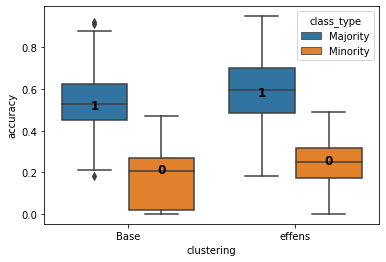

In [4]:
ax = sns.boxplot(data=min_maj_acc_df, hue="class_type", x="clustering", y="accuracy")
add_median_labels(ax)

In [30]:
predictions["count"].describe()["25%"]

10.0

In [ ]:
min_maj_acc_df.pivot(index=["dataset"])

In [86]:
all_acc_df = min_maj_acc_df.groupby(["classifier", "clustering", 
                       ])[["accuracy"]].mean().reset_index()
all_acc_df["class_type"] = "All"

In [89]:
all_acc_df

,classifier,clustering,accuracy,class_type
0,DecisionTreeClassifier,Base,34.4,All
1,DecisionTreeClassifier,effens,35.9,All
2,DummyClassifier,Base,22.0,All
3,DummyClassifier,effens,36.9,All
4,LogisticRegression,Base,42.9,All
5,LogisticRegression,effens,48.4,All
6,RandomForestClassifier,Base,43.5,All
7,RandomForestClassifier,effens,45.0,All
0,DecisionTreeClassifier,Base,45.3,Majority
1,DecisionTreeClassifier,Base,23.5,Minority


In [87]:
all_acc_df = pd.concat([all_acc_df,
           min_maj_acc_df.groupby(["classifier", "clustering", "class_type"
                       ])[["accuracy"]].mean().round(3).reset_index()])

In [88]:
#all_acc_df["accuracy"] = (all_acc_df["accuracy"]*100).round(1)
print(all_acc_df.pivot(index=["classifier", "clustering"],
                 columns="class_type", 
                 values="accuracy").to_latex())

\begin{tabular}{llrrr}
\toprule
                       & class\_type &   All &  Majority &  Minority \\
classifier & clustering &       &           &           \\
\midrule
DecisionTreeClassifier & Base &  34.4 &      45.3 &      23.5 \\
                       & effens &  35.9 &      47.4 &      24.4 \\
DummyClassifier & Base &  22.0 &      44.1 &       0.0 \\
                       & effens &  36.9 &      59.7 &      14.1 \\
LogisticRegression & Base &  42.9 &      62.9 &      23.0 \\
                       & effens &  48.4 &      68.3 &      28.6 \\
RandomForestClassifier & Base &  43.5 &      61.8 &      25.1 \\
                       & effens &  45.0 &      62.6 &      27.3 \\
\bottomrule
\end{tabular}



In [73]:
print(pd.concat([all_acc_df,
           min_maj_acc_df.groupby(["classifier", "clustering", "class_type"
                       ])[["accuracy"]].mean().round(3).reset_index()]).pivot(index=["classifier",
                                                                            "clustering"],
                                                                     columns="class_type", 
                                                                     values="accuracy").to_latex())

\begin{tabular}{llrrr}
\toprule
                       & class\_type &       All &  Majority &  Minority \\
classifier & clustering &           &           &           \\
\midrule
DecisionTreeClassifier & Base &  0.343568 &     0.453 &     0.235 \\
                       & effens &  0.359264 &     0.474 &     0.244 \\
DummyClassifier & Base &  0.220390 &     0.441 &     0.000 \\
                       & effens &  0.368980 &     0.597 &     0.141 \\
LogisticRegression & Base &  0.429461 &     0.629 &     0.230 \\
                       & effens &  0.484176 &     0.683 &     0.286 \\
RandomForestClassifier & Base &  0.434537 &     0.618 &     0.251 \\
                       & effens &  0.449761 &     0.626 &     0.273 \\
\bottomrule
\end{tabular}



In [103]:
all_acc_df[all_acc_df["class_type"] == "All"].pivot(index=["classifier", "class_type"],
                                                                     columns="clustering", 
                                                                     values="accuracy")

,clustering,Base,effens
classifier,class_type,,
DecisionTreeClassifier,All,34.4,35.9
DummyClassifier,All,22.0,36.9
LogisticRegression,All,42.9,48.4
RandomForestClassifier,All,43.5,45.0


In [54]:
min_maj_acc_df.groupby(["classifier", "clustering", "class_type"])[["accuracy"]].describe()["accuracy"]["mean"].round(3)*100

classifier              clustering  class_type
DecisionTreeClassifier  Base        Majority      45.3
                                    Minority      23.5
                        effens      Majority      47.4
                                    Minority      24.4
DummyClassifier         Base        Majority      44.1
                                    Minority       0.0
                        effens      Majority      59.7
                                    Minority      14.1
LogisticRegression      Base        Majority      62.9
                                    Minority      23.0
                        effens      Majority      68.3
                                    Minority      28.6
RandomForestClassifier  Base        Majority      61.8
                                    Minority      25.1
                        effens      Majority      62.6
                                    Minority      27.3
Name: mean, dtype: float64

In [23]:
min_maj_accuracy_df = pd.DataFrame()

predictions = pd.read_csv(f"../eval_dg_results/predictions/run_0/classification/{classifier}/{clustering}/{data}")
predictions["pred_label"] = predictions["pred_label"].apply(lambda x: ast.literal_eval(x) [0] if type(x) !=int else x)
predictions["accuracy"] = (predictions["true_label"] == predictions["pred_label"]).astype(int)
predictions["count"] = predictions.groupby("true_label")["true_label"].transform("count")
median_count = predictions["count"].median()
predictions["class_type"] = predictions["count"].apply(lambda x: "Majority" if x > median_count else "Minority")
print(data)
print("accuracy per class:")
print(predictions.groupby("class_type")["accuracy", "count"].mean())

print(predictions[predictions["class_type"] == "Majority"].groupby("class_type")["accuracy", "count"].mean())
class_type_acc = predictions.groupby("class_type")["accuracy", "count"].mean().reset_index()
class_type_acc["dataset"] = dataset
print(predictions[predictions["class_type"] == "Minority"].groupby("class_type")["accuracy", "count"].mean())
min_maj_accuracy_df = pd.concat([min_maj_accuracy_df, [""]])
print(median_count)
print(predictions)

dataset1000_clusters50_features50_gs1_sg1.csv
accuracy per class:
            accuracy      count
class_type                     
Majority    0.669118  46.808824
Minority    0.280488  10.914634
            accuracy      count
class_type                     
Majority    0.669118  46.808824
            accuracy      count
class_type                     
Minority    0.280488  10.914634
19.0
     Unnamed: 0  true_label  pred_label  accuracy  count class_type
0             0           4           5         0     12   Minority
1             1          12          11         0     70   Majority
2             2           4           6         0     12   Minority
3             3          15          14         0     10   Minority
4             4           7           7         1     19   Minority
..          ...         ...         ...       ...    ...        ...
295         295           3           5         0     14   Minority
296         296          14          17         0     20   Majori

<ipython-input-23-3ba88d47347a>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions.groupby("class_type")["accuracy", "count"].mean())
<ipython-input-23-3ba88d47347a>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions[predictions["class_type"] == "Majority"].groupby("class_type")["accuracy", "count"].mean())
<ipython-input-23-3ba88d47347a>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(predictions[predictions["class_type"] == "Minority"].groupby("class_type")["accuracy", "count"].mean())
